In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

Consider the following data:

In [7]:
data = np.loadtxt('data/photon_spectrum.csv')
energy_data, density_data = data.T

Text(0.5, 1.0, 'Photon Spectrum')

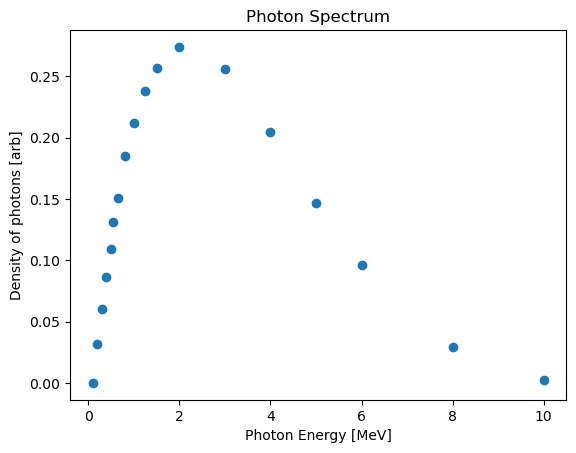

In [8]:
plt.scatter(energy_data, density_data)
plt.xlabel('Photon Energy [MeV]')
plt.ylabel('Density of photons [arb]')
plt.title('Photon Spectrum')

The data consists of a photon beam spectrum. The distribution of energies is given by the plot above. In otherwords, most of the photon energy is around 2-3 MeV, while little have close to 0 or more than 10

* Question: Whats the density of photons at 4.5234MeV?

One way of doing this is by interpolating the data. Interpolation works as follows

1. Take in data ($x_i$, $y_i$), use this data to create a function $f$ that can take in any value of $x$ and return something close to $y$
3. Evaluate $f(4.5234MeV)$

In [10]:
density_f = interp1d(energy_data, density_data)

In [11]:
density_f(4.5234)

array(0.1746428)

We can also plot this over many energies

In [13]:
energy_interp = np.linspace(min(energy_data), max(energy_data), 1000)
density_interp = density_f(energy_interp)

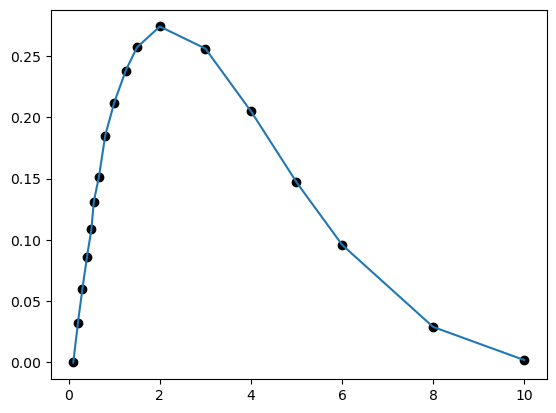

In [20]:
plt.plot(energy_interp, density_interp)
plt.scatter(energy_data, density_data, color='k')

The interpolation method used above is **linear interpolation**. In reality, we know the curve is smoother than this though.

 The typically used interpolation function is cubic (*note: this does not mean that the entire function is fit to a cubic curve, but rather that seperate segments of the curve are fit to cubic functions that are then joined together to meet*)

In [22]:
density_f = interp1d(energy_data, density_data, kind='cubic')
energy_interp = np.linspace(min(energy_data), max(energy_data), 100)
density_interp = density_f(energy_interp)

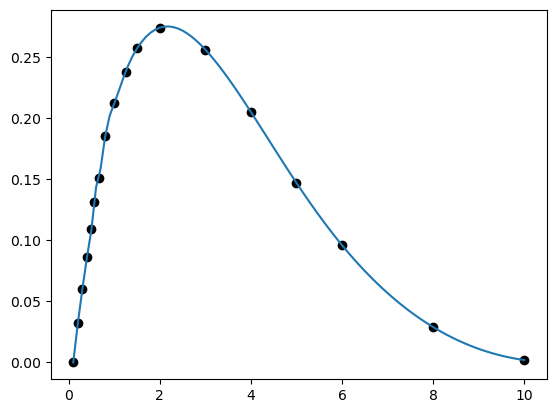

In [24]:
plt.plot(energy_interp, density_interp)
plt.scatter(energy_data, density_data, color='k')

As you can see now, the curve looks much smoother.

# Example 1:

Now lets consider an example of where this might be useful. The percent of photons between energies $E_1$ and $E_2$ is 
$$100\% \cdot \frac{\int_{E_1}^{E_2} f(E)dE}{\int_{\infty} f(E)dE}$$

Use the interpolation function to create a function $f(E)$ by interpolating the data, then feed this into the `quad` function to find the percent of photons between 2.12MeV and 3.45MeV

In [26]:
numerator = quad(density_f, 2.12, 3.45)[0]
denominator = quad(density_f, min(energy_data), max(energy_data))[0]
percent = 100 * numerator / denominator
percent

26.68315849092598

So around 27% of photons in the beam are between these two energies. 

# Example 2

When photons hit a partially transparent object, some of the light goes through, while some of it doesn't.

 For very high energy photons (those used in radiotherapy) lead is partially transparent. The amount of photons that emerge through a distance $x$ of solid lead is

 $$N(x) = N_0 e^{-\mu x}$$

 where $\mu$ is the attenuation coefficient. In reality, $\mu$ depends on the photon energy (higher energy, more penetrating), so the equation is better written as

 $$N(x;E) = N_0 e^{-\mu(E) x}$$

 Some data was collected in the lab about $\mu(E)$

In [27]:
energy_data, attenuation_data = np.loadtxt('data/lead_atteunation.csv', delimiter=',').T

Text(0.5, 0, 'Energy [MeV]')

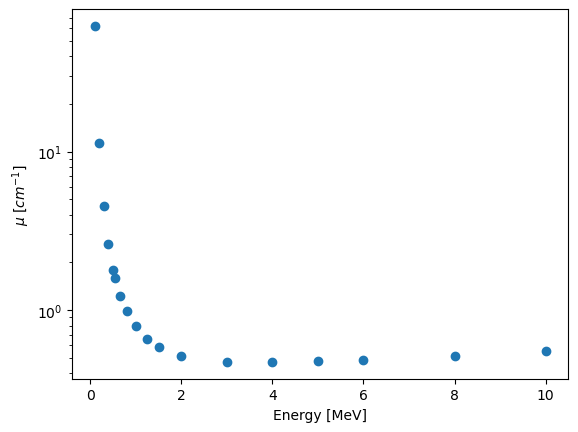

In [28]:
plt.scatter(energy_data, attenuation_data)
plt.semilogy()
plt.ylabel('$\mu ~ [cm^{-1}]$')
plt.xlabel('Energy [MeV]')

Using interpolation and $N/N_0 = e^{-\mu(E) x}$, find the percent of 4.65MeV photons that will pass through 2cm of lead

1. Get the interpolation function from the data

In [29]:
attenuation_f = interp1d(energy_data, attenuation_data, kind='cubic')

2. Make sure it actually fits the data

In [30]:
energy_interp = np.linspace(min(energy_data), max(energy_data), 100)
attenuation_interp = attenuation_f(energy_interp)

Text(0.5, 0, 'Energy [MeV]')

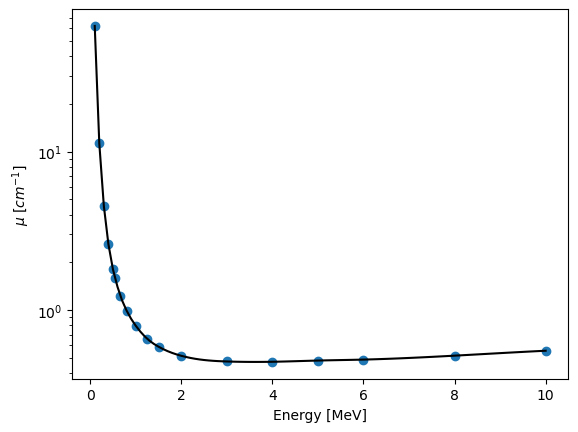

In [31]:
plt.scatter(energy_data, attenuation_data)
plt.plot(energy_interp, attenuation_interp, color='k')
plt.semilogy()
plt.ylabel('$\mu ~ [cm^{-1}]$')
plt.xlabel('Energy [MeV]')

3. Use the function to find the appropriate percent

In [32]:
attenuation_f(4.65)

array(0.47677245)

In [33]:
percent = 100 * np.exp(-attenuation_f(4.65) * 2)
percent

38.5372494599685